**Q1. Create a file “people.txt” with the following data:**

**i) Read the data from the file “people.txt”.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = open('people.txt','r')
for line in data.readlines():
    if line != '\n':
        print(line)

Age agegroup height status yearsmarried

21 adult 6.0 single -1

2 child 3 married 0

18 adult 5.7 married 20

221 elderly 5 widowed 2

34 child -7 married 3


In [4]:
df = pd.read_csv('people.txt',sep=" ",header=0)
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


**ii) Create a ruleset E that contain rules to check for the following conditions:**
1. The age should be in the range 0-150.
2. The age should be greater than yearsmarried.
3. The status should be married or single or widowed.
4. If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly.

In [7]:
def ruleset(df):
    df['Rule1'] = df['Age'].apply(lambda x: x in range(0, 150))
    df['Rule2'] = df.apply(lambda x: x.Age > x.yearsmarried, axis=1)
    df['Rule3'] = df['status'].apply(lambda x: x in {'married', 'single', 'widowed'})
    df['Rule4'] = df.apply(lambda x: (x.Age < 18 and x.agegroup == 'child') or (18 <= x.Age <= 65 and x.agegroup == 'adult') or (x.Age > 65 and x.agegroup == 'elderly'), axis=1)

**iii) Check whether ruleset E is violated by the data in the file people.txt.**

In [8]:
ruleset(df)
df

,Age,agegroup,height,status,yearsmarried,Rule1,Rule2,Rule3,Rule4
0,21,adult,6.0,single,-1,True,True,True,True
1,2,child,3.0,married,0,True,True,True,True
2,18,adult,5.7,married,20,True,False,True,True
3,221,elderly,5.0,widowed,2,False,True,True,True
4,34,child,-7.0,married,3,True,True,True,False


**iv) Summarize the results obtained in part (iii)**

1. Rule 1 : The age should be in the range 0-150.
    - violated in row 3 where Age = 221
2. Rule 2 : The age should be greater than yearsmarried.
    - violated in row 2 where Age(i.e. 18) < yearsmarried(i.e. 20)
3. Rule 3 : The status should be married or single or widowed. 
    - Not violated
4. Rule 4 : If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly.
    - violated in row 4 where Age = 34 and agegroup = 'child'

**v) Visualize the results obtained in part (iii)**

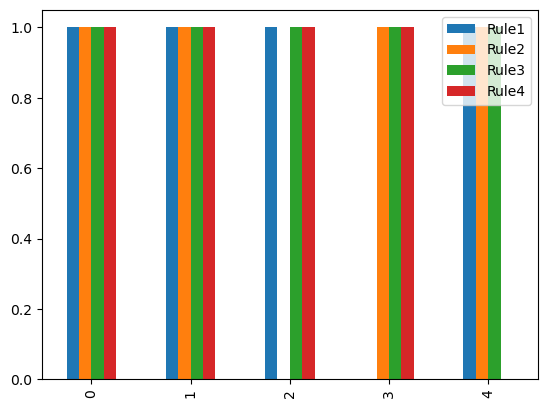

In [11]:
summary = df.loc[:, 'Rule1':'Rule4'].replace({True:1, False:0})
summary.plot(kind='bar')
plt.show()

**Q2. Perform the following preprocessing tasks on the dirty_iris dataset.**

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/edwindj/datacleaning/master/data/dirty_iris.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


**i) Calculate the number and percentage of observations that are complete.**

In [16]:
complete_obv = len(df.dropna())
print("Number of observations that are complete: ", complete_obv)
complete_percent = (len(df.dropna())/len(df)*100)
print("Percentage of observations that are complete: ", complete_percent,"%")

Number of observations that are complete:  96
Percentage of observations that are complete:  64.0 %


**ii)Replace all the special values in data with NA**

In [17]:
# df.fillna(value='NA', inplace=True)

**iii)Define these rules in a separate text file and read them.**

**Species should be one of the following values: setosa, versicolor or virginica**

In [20]:
def check_species(df):
    x = df['Species'].apply(lambda x: x in {'setosa', 'versicolor', 'virginica'})
    violations = len(df) - np.sum(x)

    if violations == 0:
        print('No Violation.')
    else:
        print('Violation: Invalid Species Name.')
        print(f'Violations: {violations}')

    return violations

In [21]:
species_violations = check_species(df)

No Violation.


**All measured numerical properties of an iris should be positive**

In [24]:
def check_all_positive(df):
    x = df.loc[:, 'Sepal.Length':'Petal.Width'].apply(lambda x: x > 0).values
    x = x.reshape(-1)
    violations = len(df) * 4 - np.sum(x)

    if violations == 0:
        print('No Violation.')
    else:
        print('Violation: Non-positive Numerical Property.')
        print(f'Violations: {violations}')

    return violations

In [25]:
non_positive_violations = check_all_positive(df)

Violation: Non-positive Numerical Property.
Violations: 62


**The petal length of an iris is at least 2 times its petal width.**

In [26]:
def check_petal_length(df):
    x = df['Petal.Length'] >= 2 * df['Petal.Width']
    violations = x.value_counts().loc[False]

    if violations == 0:
        print('No Violation.')
    else:
        print('Violation: Petal Length is less than twice its Petal Width.')
        print(f'Violations: {violations}')

    return violations

In [27]:
petal_length_violations = check_petal_length(df)

Violation: Petal Length is less than twice its Petal Width.
Violations: 34


**The sepal length of an iris cannot exceed 30 cm.**

In [28]:
def check_sepal_length(df):
    x = df['Sepal.Length'] <= 30
    violations = x.value_counts().loc[False]

    if violations == 0:
        print('No Violation.')
    else:
        print('Violation: Sepal Length exceeded the value of 30cms.')
        print(f'Violations: {violations}')

    return violations

In [29]:
sepal_length_violations = check_sepal_length(df)

Violation: Sepal Length exceeded the value of 30cms.
Violations: 12


**The sepals of an iris are longer than its petals.**

In [30]:
def check_sepal_petal_length(df):
    x = df['Sepal.Length'] > df['Petal.Length']
    violations = x.value_counts().loc[False]

    if violations == 0:
        print('No Violation.')
    else:
        print('Violation: Sepal Length are less than Petal Length.')
        print(f'Violations: {violations}')

    return violations

In [31]:
sepal_petal_violations = check_sepal_petal_length(df)

Violation: Sepal Length are less than Petal Length.
Violations: 30


**iv) Determine how often each rule is broken (violatedEdits). Also summarize and plot the result.**

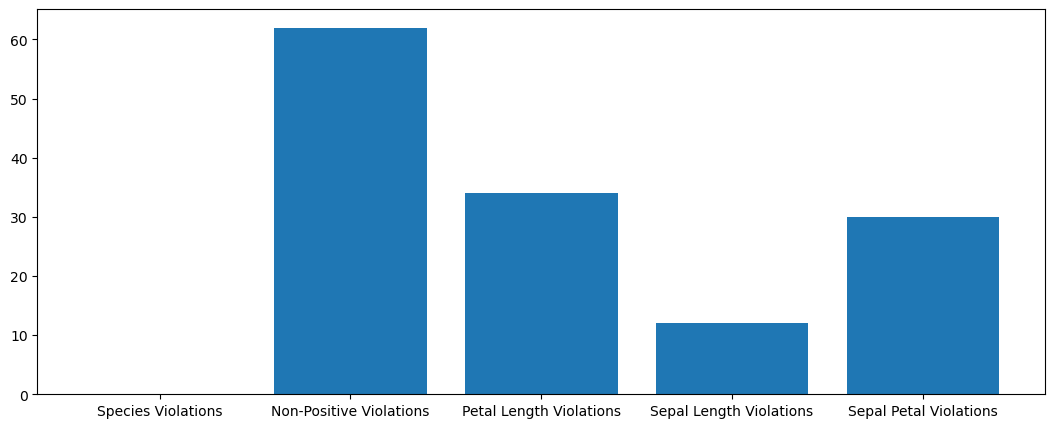

In [32]:
rule_break_frequency = {
    'Species Violations': species_violations,
    'Non-Positive Violations': non_positive_violations,
    'Petal Length Violations': petal_length_violations,
    'Sepal Length Violations': sepal_length_violations,
    'Sepal Petal Violations': sepal_petal_violations
}

fig = plt.figure(figsize=(13, 5))
plt.bar(rule_break_frequency.keys(), rule_break_frequency.values())
plt.show()

**v) Find outliers in sepal length using boxplot**

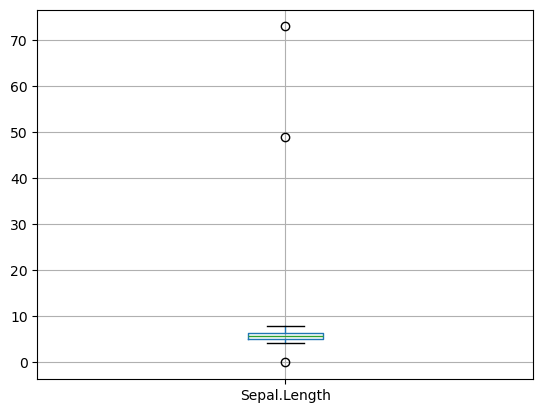

In [40]:
df.boxplot(column='Sepal.Length', return_type='axes');

**Q3. Load the data from wine dataset. Check whether all attributes are standardized or not (mean is 0 and standard deviation is 1). If not, standardize the attributes. Do the same with Iris dataset.**

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine, load_iris

**Wine Dataset**

In [42]:
df = load_wine()
X = df.data

**Mean and standard deviation along the columns.**

In [43]:
X.mean(axis=0)

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])

In [44]:
X.std(axis=0)

array([8.09542915e-01, 1.11400363e+00, 2.73572294e-01, 3.33016976e+00,
       1.42423077e+01, 6.24090564e-01, 9.96048950e-01, 1.24103260e-01,
       5.70748849e-01, 2.31176466e+00, 2.27928607e-01, 7.07993265e-01,
       3.14021657e+02])

**Standardizing the dataset.**

In [45]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [46]:
X.mean(axis=0)

array([ 7.84141790e-15,  2.44498554e-16, -4.05917497e-15, -7.11041712e-17,
       -2.49488320e-17, -1.95536471e-16,  9.44313292e-16, -4.17892936e-16,
       -1.54059038e-15, -4.12903170e-16,  1.39838203e-15,  2.12688793e-15,
       -6.98567296e-17])

In [47]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Iris Dataset**

In [48]:
df = load_iris()
X = df.data

**Mean and standard deviation along the columns.**

In [49]:
X.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [50]:
X.std(axis=0)

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

**Standardizing the dataset.**

In [52]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [53]:
X.mean(axis=0)

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [54]:
X.std(axis=0)

array([1., 1., 1., 1.])

**Q4. Run Apriori algorithm to find frequent itemsets and association rules.**

In [57]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.4 MB 2.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 5.0 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.8 MB/s eta 0:00:00


In [58]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [59]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [61]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


**4.1 Use minimum support as 50% and minimum confidence as 75%.**

In [62]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


In [63]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.00,0.00,1.0,0.0
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.0,1.00,0.00,inf,0.0
2,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf,0.5
3,(Milk),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf,0.0
4,(Onion),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf,0.0
5,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf,0.0
6,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf,0.0
7,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf,0.5
8,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.0,1.25,0.12,inf,0.5


**4.2 Use minimum support as 60% and minimum confidence as 60 %.**

In [64]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


In [65]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0,0.0
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf,0.0
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf,0.0
5,(Kidney Beans),(Milk),1.0,0.6,0.6,0.60,1.00,0.00,1.0,0.0
6,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf,0.0
7,(Kidney Beans),(Onion),1.0,0.6,0.6,0.60,1.00,0.00,1.0,0.0
8,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf,0.0
9,(Kidney Beans),(Yogurt),1.0,0.6,0.6,0.60,1.00,0.00,1.0,0.0


**Q5. Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers. Divide the data set into training and test set. Compare the accuracy of the different classifiers under the following situations:**

In [72]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [73]:
X, y = load_iris(return_X_y=True)

**5.1 a) Training set = 75% Test set = 25%**

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

**Naive Bayes Classifier**

In [75]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100} %')

Accuracy Score: 94.73684210526315 %


**K-Nearest Neighbors Classifier**

In [76]:
knn = KNeighborsClassifier()    # default k=5
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100} %')

Accuracy Score: 97.36842105263158 %


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



**Decision Tree Classifier**

In [78]:
dtree = DecisionTreeClassifier()    # default criteria='gini'
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100} %')

Accuracy Score: 94.73684210526315 %


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



**5.1 b) Training set = 66.6% (2/3rd of total), Test set = 33.3%**

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

**Naive Bayes Classifier**

In [81]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100} %')

Accuracy Score: 96.0 %


**K-Nearest Neighbors Classifier**

In [82]:
knn = KNeighborsClassifier()    # default k=5
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100} %')
print(classification_report(y_test, y_pred))

Accuracy Score: 98.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        18

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



**Decision Tree Classifier**

In [83]:
dtree = DecisionTreeClassifier()    # default criteria='gini'
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100} %')
print(classification_report(y_test, y_pred))

Accuracy Score: 96.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        18

    accuracy                           0.96        50
   macro avg       0.95      0.95      0.95        50
weighted avg       0.96      0.96      0.96        50



**5.2 a) Training set is chosen by hold out method.**

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [85]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100} %')

Accuracy Score: 95.55555555555556 %


**K-Nearest Neighbors Classifier**

In [86]:
knn = KNeighborsClassifier()    # default k=5
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100} %')
print(classification_report(y_test, y_pred))

Accuracy Score: 97.77777777777777 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**Decision Tree Classifier**

In [87]:
dtree = DecisionTreeClassifier()    # default criteria='gini'
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100} %')
print(classification_report(y_test, y_pred))

Accuracy Score: 95.55555555555556 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



**5.2 b) Training set is chosen by Random Subsampling.**

In [88]:
from sklearn.model_selection import ShuffleSplit

In [89]:
rs = ShuffleSplit(n_splits=10, test_size=0.25, random_state=100)

accuracy_gnb = []
accuracy_knn = []
accuracy_dtree = []

In [90]:
for train_index, test_index in rs.split(X):
    X_train = np.array([X[index] for index in train_index])
    X_test = np.array([X[index] for index in test_index])
    y_train = np.array([y[index] for index in train_index])
    y_test = np.array([y[index] for index in test_index])

    y_pred = GaussianNB().fit(X_train, y_train).predict(X_test)
    accuracy_gnb.append(accuracy_score(y_test, y_pred))

    y_pred = KNeighborsClassifier().fit(X_train, y_train).predict(X_test)
    accuracy_knn.append(accuracy_score(y_test, y_pred))

    y_pred = DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)
    accuracy_dtree.append(accuracy_score(y_test, y_pred))

In [91]:
print(f'Mean accuracy of Gaussian Naive Bayes: {sum(accuracy_gnb) / len(accuracy_gnb) * 100} %')
print(f'Mean accuracy of K-Nearest Neighbors: {sum(accuracy_knn) / len(accuracy_knn) * 100} %')
print(f'Mean accuracy of Decision Tree Classifier: {sum(accuracy_dtree) / len(accuracy_dtree) * 100} %')

Mean accuracy of Gaussian Naive Bayes: 96.05263157894737 %
Mean accuracy of K-Nearest Neighbors: 96.84210526315789 %
Mean accuracy of Decision Tree Classifier: 94.99999999999999 %


**5.2 c) Training set is chosen by Cross Validation.**

In [92]:
dtree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
print(f'Mean accuracy of Gaussian Naive Bayes: {sum(accuracy_gnb) / len(accuracy_gnb) * 100} %')
print(f'Mean accuracy of K-Nearest Neighbors: {sum(accuracy_knn) / len(accuracy_knn) * 100} %')
print(f'Mean accuracy of Decision Tree Classifier: {sum(accuracy_dtree) / len(accuracy_dtree) * 100} %')

Mean accuracy of Gaussian Naive Bayes: 96.05263157894737 %
Mean accuracy of K-Nearest Neighbors: 96.84210526315789 %
Mean accuracy of Decision Tree Classifier: 94.99999999999999 %


**5.3 Data is scaled to standard format.**

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [95]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Naive Bayes Classifier**

In [96]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100} %')

Accuracy Score: 94.73684210526315 %


**K-Nearest Neighbors Classifier**

In [97]:
knn = KNeighborsClassifier()    # default k=5
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100} %')
print(classification_report(y_test, y_pred))

Accuracy Score: 97.36842105263158 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



**Decision Tree Classifier**

In [98]:
dtree = DecisionTreeClassifier()    # default criteria='gini'
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100} %')
print(classification_report(y_test, y_pred))

Accuracy Score: 94.73684210526315 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



**Q6. Use Simple Kmeans, DBScan, Hierachical clustering algorithms for clustering. Compare the performance of clusters by changing the parameters involved in the algorithms.**

In [99]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt

#from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [100]:
df = load_iris(as_frame=True).frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Plotting Sepal Width and Petal Length**

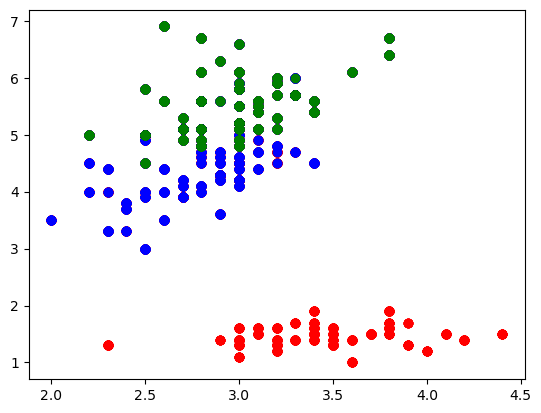

In [103]:
for index in range(150):
    if index <= 49:
        plt.plot(df.values[index:, 1], df.values[index:, 2], 'ro')
    elif index > 49 and index <= 99:
        plt.plot(df.values[index:, 1], df.values[index:, 2], 'bo')
    elif index > 99:
        plt.plot(df.values[index:, 1], df.values[index:, 2], 'go')
        
plt.show()

**K-Means Clustering**

In [109]:
k_cluster = KMeans(n_clusters=3)
k_cluster.fit(df.values[:, 1:3])

C:\Users\lamot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lamot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

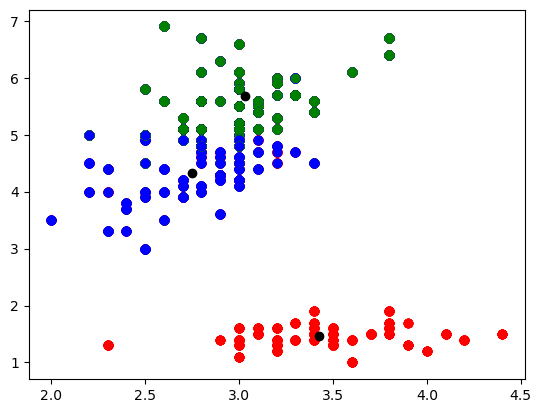

In [111]:
for index in range(150):
    if k_cluster.labels_[index] == 0:
        plt.plot(df.values[index:, 1], df.values[index:, 2], 'go')
    elif k_cluster.labels_[index] == 1:
        plt.plot(df.values[index:, 1], df.values[index:, 2], 'ro')
    elif k_cluster.labels_[index] == 2:
        plt.plot(df.values[index:, 1], df.values[index:, 2], 'bo')
        
plt.plot(k_cluster.cluster_centers_[:, 0], k_cluster.cluster_centers_[:, 1], 'o', c='black')
plt.show()

**Hierarchical Agglomerative Clustering**

In [113]:
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_cluster.fit(df.values[:, 1:3])

AgglomerativeClustering(n_clusters=3)

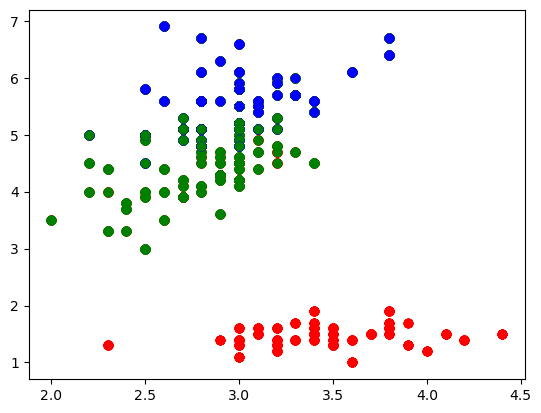

In [115]:
for index in range(150):
    if agg_cluster.labels_[index] == 0:
        plt.plot(df.values[index:, 1], df.values[index:, 2], 'go')
    elif agg_cluster.labels_[index] == 1:
        plt.plot(df.values[index:, 1], df.values[index:, 2], 'ro')
    elif agg_cluster.labels_[index] == 2:
        plt.plot(df.values[index:, 1], df.values[index:, 2], 'bo')
        
plt.show()

**DBSCAN Clustering**

In [116]:
db_cluster = DBSCAN()
db_cluster.fit(df.values[:, 1:3])

DBSCAN()

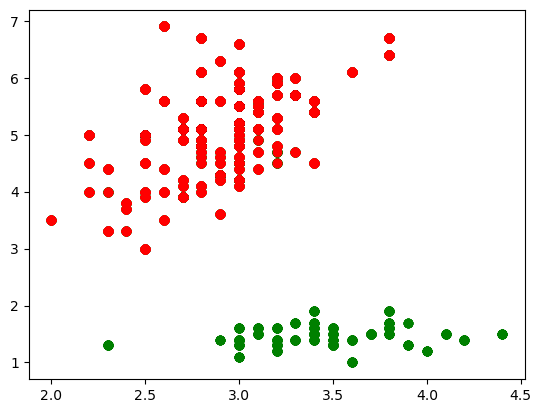

In [118]:
for index in range(150):
    if db_cluster.labels_[index] == 0:
        plt.plot(df.values[index:, 1], df.values[index:, 2], 'go')
    elif db_cluster.labels_[index] == 1:
        plt.plot(df.values[index:, 1], df.values[index:, 2], 'ro')
    elif db_cluster.labels_[index] == 2:
        plt.plot(df.values[index:, 1], df.values[index:, 2], 'bo')
        
plt.show()